In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [2]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [3]:
data=pd.read_csv('dataset.csv')
data

,Kode Produk,19-Jan,19-Feb,19-Mar,19-Apr,19-May,19-Jun,19-Jul,19-Aug,19-Sep,...,20-Apr,20-May,20-Jun,20-Jul,20-Aug,20-Sep,20-Oct,20-Nov,20-Dec,Cluster
0,P1,56,7,8,14,16,10,21,20,68,...,17,6,9,62,67,62,67,77,11,0
1,P2,164,190,188,164,235,139,662,240,138,...,367,227,55,222,220,85,336,153,103,1
2,P3,65,58,79,109,50,51,73,92,28,...,121,23,30,26,19,23,21,20,7,0
3,P4,243,304,321,241,191,97,276,165,170,...,304,72,102,102,113,112,102,118,120,1
4,P5,10,13,24,14,28,9,19,10,24,...,16,11,7,10,16,18,18,23,22,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,P154,243,379,292,232,287,107,344,455,436,...,129,85,115,232,79,112,450,498,254,1
154,P155,-5,0,0,10,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
155,P156,101,65,117,94,197,151,157,159,144,...,152,129,136,177,120,167,153,130,121,1
156,P157,0,0,0,0,0,8,49,93,103,...,19,26,29,49,43,34,51,51,43,0


In [4]:
len(data['Cluster'].unique())

5

In [5]:
#now lets take clusters
c0 = data.query("Cluster == 0")
print("Jumlah Produk:")
print(c0['Kode Produk'].size)
c1 = data.query("Cluster == 1")
print("Jumlah Produk:")
print(c1['Kode Produk'].size)
c2 = data.query("Cluster == 2")
print("Jumlah Produk:")
print(c2['Kode Produk'].size)
c3 = data.query("Cluster == 3")
print("Jumlah Produk:")
print(c3['Kode Produk'].size)
c4 = data.query("Cluster == 4")
print("Jumlah Produk:")
print(c4['Kode Produk'].size)

Jumlah Produk:
96
Jumlah Produk:
45
Jumlah Produk:
1
Jumlah Produk:
3
Jumlah Produk:
13


In [6]:
#oke ada ternyata yang cuman sendirian (1 product di cluster tersebut), kita beresin dia dulu, the easiest, dan biar keliatan kita
#ngapain aja di time series ini
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[1:]))
    return ds.batch(batch_size).prefetch(1)
# ini fungsinya buat nge ubah dataset jadi windowed

# C2

In [7]:
#next kita ubah bentuk data nya dari yang tadinya kesamping jadi ke bawah, tapi pertama mau aku drop dulu cluster sama kode produknya
c2=c2.drop(columns=['Kode Produk','Cluster'])
c2

,19-Jan,19-Feb,19-Mar,19-Apr,19-May,19-Jun,19-Jul,19-Aug,19-Sep,19-Oct,...,20-Mar,20-Apr,20-May,20-Jun,20-Jul,20-Aug,20-Sep,20-Oct,20-Nov,20-Dec
79,4624,959,1500,4900,1812,2128,3913,5320,2657,4730,...,3682,3585,6316,2531,3752,2508,3637,3854,3951,3220


In [8]:
#next, buat dia kayak mejeneng time series seperti biasanya, which is datanya ke bawah, 
new_c2=[]
time=[]
for idx,_ in enumerate(c2):
    new_c2.append(c2.iloc[0,idx])
    time.append(idx)
print(time,new_c2)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23] [4624, 959, 1500, 4900, 1812, 2128, 3913, 5320, 2657, 4730, 181, 2337, 2382, 1005, 3682, 3585, 6316, 2531, 3752, 2508, 3637, 3854, 3951, 3220]


In [9]:
#normalisasi, karena gap nya ada yang sampe ribuan, biar lebih gampang tugas ann nya
series=new_c2
min = np.min(series)
max = np.max(series)
series = series - min
series = series / (max-min)

# scaler = MinMaxScaler(feature_range=(0, 1))
# series = scaler.fit_transform(series)

time = np.array(time)

In [10]:
series

array([0.72420538, 0.12681337, 0.21499593, 0.76919315, 0.26585167,
       0.31735941, 0.60831296, 0.83765281, 0.40358598, 0.74148329,
       0.        , 0.35142624, 0.35876121, 0.13431133, 0.57066015,
       0.55484923, 1.        , 0.38304808, 0.58207009, 0.3792991 ,
       0.56332518, 0.59869601, 0.61450693, 0.49535452])

In [14]:
split_time = 3 # ini berapa bulan terkahir yang mau di potong buat pengujian?

time_train = time[:-split_time]
x_train =  series[:-split_time]
time_valid =  time[-split_time:]
x_valid =  series[-split_time:]

In [15]:
x_valid

array([0.59869601, 0.61450693, 0.49535452])

In [16]:
#buat data biar dibagi per window, jadi me masang masangkan waktu dan value,
window_size = 2
batch_size = 2
shuffle_buffer_size = 10

train_set = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)
valid_set = windowed_dataset(x_valid, window_size, batch_size, shuffle_buffer_size)

In [30]:
model = tf.keras.Sequential([
        tf.keras.layers.Dense(2, input_shape=[None, 1]),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,return_sequences=True)),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
        # tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(4)),
        tf.keras.layers.Flatten(),
        #tf.keras.layers.GlobalAveragePooling1D(),
        tf.keras.layers.Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l1(l1=0.001)),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.001, l2=0.001)),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(1)
    ])

    #the blstm part

In [31]:
#Using mae and mse
#model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9),metrics=['mae'],loss='mse')
model.compile(optimizer=tf.keras.optimizers.Adam(),metrics=['mae'],loss='mse')
model.summary()
hist=model.fit(valid_set,epochs=150,validation_data=train_set, batch_size=2)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, None, 2)           4         
_________________________________________________________________
bidirectional_6 (Bidirection (None, None, 128)         34304     
_________________________________________________________________
bidirectional_7 (Bidirection (None, 64)                41216     
_________________________________________________________________
flatten_3 (Flatten)          (None, 64)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 512)               33280     
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 64)               

InternalError:  Attempting to perform BLAS operation using StreamExecutor without BLAS support
	 [[node sequential_3/dense_15/Tensordot/MatMul (defined at \AppData\Local\Temp/ipykernel_6396/4280606705.py:5) ]] [Op:__inference_train_function_35351]

Function call stack:
train_function


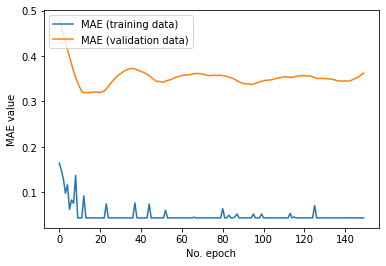

In [15]:
import matplotlib.pyplot as plt

plt.plot(hist.history['mae'], label='MAE (training data)')
plt.plot(hist.history['val_mae'], label='MAE (validation data)')

plt.ylabel('MAE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

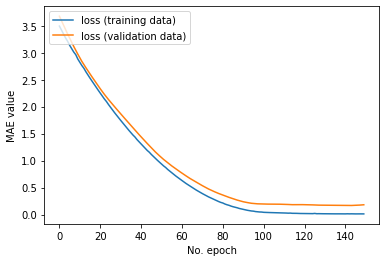

In [16]:
plt.plot(hist.history['loss'], label='loss (training data)')
plt.plot(hist.history['val_loss'], label='loss (validation data)')

plt.ylabel('MAE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [17]:
prediksi=model.predict([21, 22, 23])
prediksi

array([[0.14843737],
       [0.14843738],
       [0.14843738]], dtype=float32)

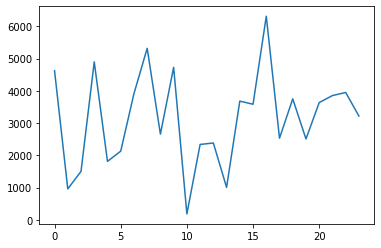

In [18]:
series = series * (max-min)
series = series + min
plt.plot(series)

In [19]:
prediksi = prediksi * (max-min)
prediksi = prediksi + min
prediksi

array([[1091.6633],
       [1091.6633],
       [1091.6633]], dtype=float32)

In [20]:
prediksi=prediksi.flatten()

In [21]:
hasil=np.concatenate((series[:-split_time],prediksi))

In [22]:
hasil

array([4624.        ,  959.        , 1500.        , 4900.        ,
       1812.        , 2128.        , 3913.        , 5320.        ,
       2657.        , 4730.        ,  181.        , 2337.        ,
       2382.        , 1005.        , 3682.        , 3585.        ,
       6316.        , 2531.        , 3752.        , 2508.        ,
       3637.        , 1091.66333008, 1091.66333008, 1091.66333008])

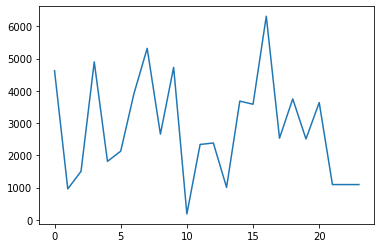

In [23]:
plt.plot(hasil)

In [124]:
model.save('cluster2.h5')

# C0

In [94]:
## do the same for the others, tapi karena yang lain punya beberapa anggota, nah itu di average dulu per tanggalnya
c0=c0.drop(columns=['Kode Produk', 'Cluster'])


In [95]:
#next, buat dia kayak mejeneng time series seperti biasanya, which is datanya ke bawah, tapi di average per tanggal 
new_c0=[]
time=[]
for idx,a in enumerate(c0):
    new_c0.append(c0[a].mean())
    time.append(idx)


In [96]:
new_c0

[28.010416666666668,
 25.8125,
 26.0,
 24.8125,
 28.427083333333332,
 15.791666666666666,
 31.25,
 22.510416666666668,
 30.760416666666668,
 33.020833333333336,
 28.020833333333332,
 23.677083333333332,
 27.677083333333332,
 26.78125,
 26.270833333333332,
 19.114583333333332,
 11.395833333333334,
 13.270833333333334,
 20.385416666666668,
 22.083333333333332,
 21.53125,
 15.895833333333334,
 19.885416666666668,
 19.5625]

In [97]:
#normalisasi, karena gap nya ada yang sampe ribuan, biar lebih gampang tugas ann nya
series=new_c0
min = np.min(series)
max = np.max(series)
series = series - min
series = series / (max-min)
time = np.array(time)

In [98]:
series

array([0.76830443, 0.66666667, 0.67533719, 0.62042389, 0.78757225,
       0.20327553, 0.91811175, 0.51396917, 0.89547206, 1.        ,
       0.76878613, 0.56791908, 0.75289017, 0.71146435, 0.68786127,
       0.35693642, 0.        , 0.0867052 , 0.41570328, 0.49421965,
       0.46868979, 0.20809249, 0.39258189, 0.37764933])

In [99]:
split_time = 3 # ini berapa bulan terkahir yang mau di potong buat pengujian?

time_train = time[:-split_time]
x_train =  series[:-split_time]
time_valid =  time[-split_time:]
x_valid =  series[-split_time:]

In [100]:
#buat data biar dibagi per window, jadi me masang masangkan waktu dan value,
window_size = 2
batch_size = 2
shuffle_buffer_size = 10

train_set = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)
valid_set = windowed_dataset(x_valid, window_size, batch_size, shuffle_buffer_size)

In [17]:
model = tf.keras.Sequential([
        tf.keras.layers.Dense(2, input_shape=[None, 1]),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,return_sequences=True)),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
        # tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(4)),
        tf.keras.layers.Flatten(),
        #tf.keras.layers.GlobalAveragePooling1D(),
        tf.keras.layers.Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l1(l1=0.001)),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.001, l2=0.001)),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(1)
    ])

    #the blstm part

In [102]:
#Using mae and mse
model.compile(optimizer=tf.keras.optimizers.Adam(),metrics=['mae'],loss='mse')
model.summary()
hist=model.fit(valid_set,epochs=150,validation_data=train_set)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, None, 2)           4         
_________________________________________________________________
bidirectional_12 (Bidirectio (None, None, 128)         34304     
_________________________________________________________________
bidirectional_13 (Bidirectio (None, 64)                41216     
_________________________________________________________________
flatten_6 (Flatten)          (None, 64)                0         
_________________________________________________________________
dense_31 (Dense)             (None, 512)               33280     
_________________________________________________________________
dropout_12 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 64)               

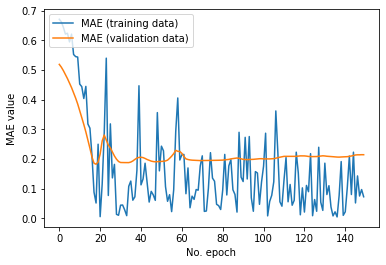

In [103]:
import matplotlib.pyplot as plt
plt.plot(hist.history['mae'], label='MAE (training data)')
plt.plot(hist.history['val_mae'], label='MAE (validation data)')

plt.ylabel('MAE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [104]:
prediksi=model.predict([21, 22, 23])
prediksi

array([[1.0907921],
       [1.0933269],
       [1.095494 ]], dtype=float32)

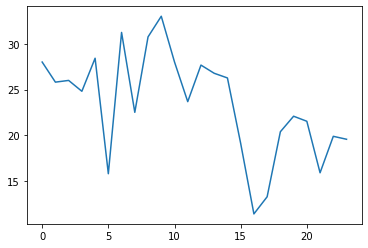

In [105]:
#data asli
series = series * (max-min)
series = series + min
plt.plot(series)

In [106]:
prediksi = prediksi * (max-min)
prediksi = prediksi + min
prediksi

array([[34.98421],
       [35.03903],
       [35.08589]], dtype=float32)

In [107]:
prediksi=prediksi.flatten()

In [108]:
hasil=np.concatenate((series[:-split_time],prediksi))

In [109]:
hasil

array([28.01041667, 25.8125    , 26.        , 24.8125    , 28.42708333,
       15.79166667, 31.25      , 22.51041667, 30.76041667, 33.02083333,
       28.02083333, 23.67708333, 27.67708333, 26.78125   , 26.27083333,
       19.11458333, 11.39583333, 13.27083333, 20.38541667, 22.08333333,
       21.53125   , 34.98421097, 35.03902817, 35.08589172])

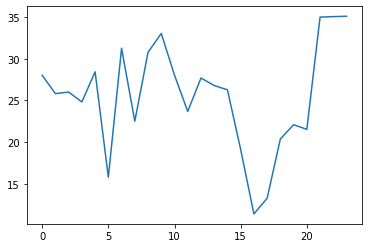

In [110]:
#data prediksi
plt.plot(hasil)

In [112]:
model.save('cluster0.h5')

# C1

In [128]:
## do the same for the others, tapi karena yang lain punya beberapa anggota, nah itu di average dulu per tanggalnya
c1=c1.drop(columns=['Kode Produk', 'Cluster'])

In [129]:
#next, buat dia kayak mejeneng time series seperti biasanya, which is datanya ke bawah, tapi di average per tanggal 
new_c1=[]
time=[]
for idx,a in enumerate(c1):
    new_c1.append(c1[a].mean())
    time.append(idx)


In [130]:
new_c1

[183.8,
 191.73333333333332,
 179.55555555555554,
 181.24444444444444,
 182.8,
 137.6888888888889,
 185.73333333333332,
 194.46666666666667,
 145.06666666666666,
 143.48888888888888,
 175.04444444444445,
 122.86666666666666,
 177.8,
 147.6,
 206.0222222222222,
 141.9111111111111,
 100.28888888888889,
 101.15555555555555,
 141.55555555555554,
 105.88888888888889,
 123.93333333333334,
 183.64444444444445,
 147.73333333333332,
 135.24444444444444]

In [131]:
#normalisasi, karena gap nya ada yang sampe ribuan, biar lebih gampang tugas ann nya
series=new_c1
min = np.min(series)
max = np.max(series)
series = series - min
series = series / (max-min)
time = np.array(time)

In [132]:
split_time = 3 # ini berapa bulan terkahir yang mau di potong buat pengujian?

time_train = time[:-split_time]
x_train =  series[:-split_time]
time_valid =  time[-split_time:]
x_valid =  series[-split_time:]

In [133]:
#buat data biar dibagi per window, jadi me masang masangkan waktu dan value,
window_size = 2
batch_size = 2
shuffle_buffer_size = 10

train_set = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)
valid_set = windowed_dataset(x_valid, window_size, batch_size, shuffle_buffer_size)

In [134]:
model = tf.keras.Sequential([
        tf.keras.layers.Dense(2, input_shape=[None, 1]),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,return_sequences=True)),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
        # tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(4)),
        tf.keras.layers.Flatten(),
        #tf.keras.layers.GlobalAveragePooling1D(),
        tf.keras.layers.Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l1(l1=0.001)),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.001, l2=0.001)),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(1)
    ])

    #the blstm part

In [135]:
#Using mae and mse
model.compile(optimizer=tf.keras.optimizers.Adam(),metrics=['mae'],loss='mse')
model.summary()
hist=model.fit(valid_set,epochs=150,validation_data=train_set)

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, None, 2)           4         
_________________________________________________________________
bidirectional_16 (Bidirectio (None, None, 128)         34304     
_________________________________________________________________
bidirectional_17 (Bidirectio (None, 64)                41216     
_________________________________________________________________
flatten_8 (Flatten)          (None, 64)                0         
_________________________________________________________________
dense_41 (Dense)             (None, 512)               33280     
_________________________________________________________________
dropout_16 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_42 (Dense)             (None, 64)               

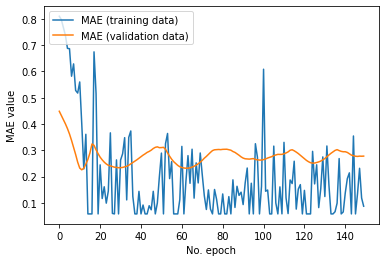

In [136]:
plt.plot(hist.history['mae'], label='MAE (training data)')
plt.plot(hist.history['val_mae'], label='MAE (validation data)')

plt.ylabel('MAE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

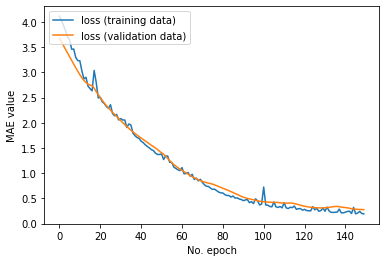

In [137]:
plt.plot(hist.history['loss'], label='loss (training data)')
plt.plot(hist.history['val_loss'], label='loss (validation data)')

plt.ylabel('MAE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [138]:
prediksi=model.predict([21, 22, 23])
prediksi

array([[1.0382313],
       [1.0362958],
       [1.0342647]], dtype=float32)

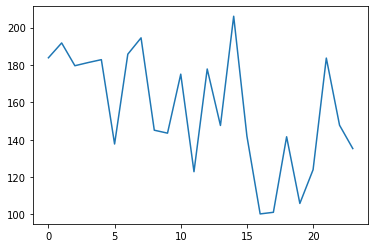

In [139]:
#data asli
series = series * (max-min)
series = series + min
plt.plot(series)

In [140]:
prediksi = prediksi * (max-min)
prediksi = prediksi + min
prediksi

array([[210.06454],
       [209.8599 ],
       [209.64514]], dtype=float32)

In [141]:
prediksi=prediksi.flatten()

In [142]:
hasil=np.concatenate((series[:-split_time],prediksi))

In [143]:
hasil

array([183.8       , 191.73333333, 179.55555556, 181.24444444,
       182.8       , 137.68888889, 185.73333333, 194.46666667,
       145.06666667, 143.48888889, 175.04444444, 122.86666667,
       177.8       , 147.6       , 206.02222222, 141.91111111,
       100.28888889, 101.15555556, 141.55555556, 105.88888889,
       123.93333333, 210.06454468, 209.8598938 , 209.6451416 ])

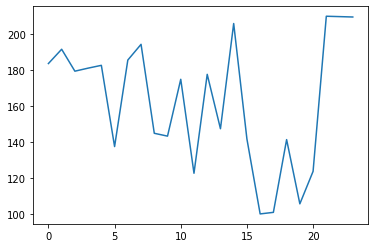

In [144]:
#data prediksi
plt.plot(hasil)

In [145]:
model.save('cluster1.h5')

# C3

In [149]:
## do the same for the others, tapi karena yang lain punya beberapa anggota, nah itu di average dulu per tanggalnya
c3=c3.drop(columns=['Kode Produk', 'Cluster'])

In [150]:
#next, buat dia kayak mejeneng time series seperti biasanya, which is datanya ke bawah, tapi di average per tanggal 
new_c3=[]
time=[]
for idx,a in enumerate(c3):
    new_c3.append(c3[a].mean())
    time.append(idx)

In [151]:
new_c3

[1844.6666666666667,
 2857.0,
 2156.6666666666665,
 2060.6666666666665,
 2336.3333333333335,
 2655.3333333333335,
 2044.0,
 2490.6666666666665,
 1824.3333333333333,
 2065.3333333333335,
 2837.3333333333335,
 1107.0,
 138.66666666666666,
 113.33333333333333,
 68.0,
 44.333333333333336,
 194.66666666666666,
 68.0,
 74.66666666666667,
 91.66666666666667,
 145.66666666666666,
 110.0,
 114.0,
 64.66666666666667]

In [152]:
#normalisasi, karena gap nya ada yang sampe ribuan, biar lebih gampang tugas ann nya
series=new_c3
min = np.min(series)
max = np.max(series)
series = series - min
series = series / (max-min)
time = np.array(time)

In [153]:
split_time = 3 # ini berapa bulan terkahir yang mau di potong buat pengujian?

time_train = time[:-split_time]
x_train =  series[:-split_time]
time_valid =  time[-split_time:]
x_valid =  series[-split_time:]

In [154]:
#buat data biar dibagi per window, jadi me masang masangkan waktu dan value,
window_size = 2
batch_size = 2
shuffle_buffer_size = 10

train_set = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)
valid_set = windowed_dataset(x_valid, window_size, batch_size, shuffle_buffer_size)

In [155]:
model = tf.keras.Sequential([
        tf.keras.layers.Dense(2, input_shape=[None, 1]),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,return_sequences=True)),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
        # tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(4)),
        tf.keras.layers.Flatten(),
        #tf.keras.layers.GlobalAveragePooling1D(),
        tf.keras.layers.Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l1(l1=0.001)),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.001, l2=0.001)),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(1)
    ])

    #the blstm part

In [156]:
#Using mae and mse
model.compile(optimizer=tf.keras.optimizers.Adam(),metrics=['mae'],loss='mse')
model.summary()
hist=model.fit()(valid_set,epochs=150,validation_data=train_set)

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_45 (Dense)             (None, None, 2)           4         
_________________________________________________________________
bidirectional_18 (Bidirectio (None, None, 128)         34304     
_________________________________________________________________
bidirectional_19 (Bidirectio (None, 64)                41216     
_________________________________________________________________
flatten_9 (Flatten)          (None, 64)                0         
_________________________________________________________________
dense_46 (Dense)             (None, 512)               33280     
_________________________________________________________________
dropout_18 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_47 (Dense)             (None, 64)               

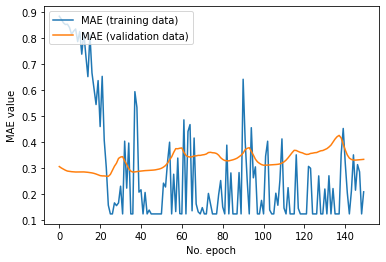

In [157]:
plt.plot(hist.history['mae'], label='MAE (training data)')
plt.plot(hist.history['val_mae'], label='MAE (validation data)')

plt.ylabel('MAE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

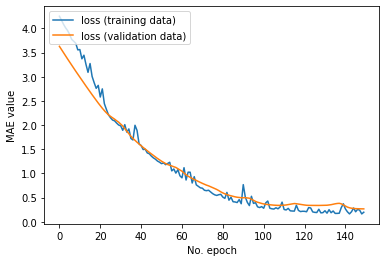

In [158]:
plt.plot(hist.history['loss'], label='loss (training data)')
plt.plot(hist.history['val_loss'], label='loss (validation data)')

plt.ylabel('MAE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [159]:
prediksi=model.predict([21, 22, 23])
prediksi

array([[1.0165747],
       [1.0179235],
       [1.0189734]], dtype=float32)

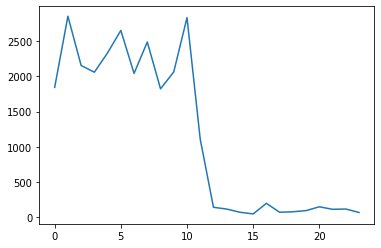

In [160]:
#data asli
series = series * (max-min)
series = series + min
plt.plot(series)

In [161]:
prediksi = prediksi * (max-min)
prediksi = prediksi + min
prediksi

array([[2903.6191],
       [2907.4128],
       [2910.3657]], dtype=float32)

In [162]:
prediksi=prediksi.flatten()

In [163]:
hasil=np.concatenate((series[:-split_time],prediksi))

In [164]:
hasil

array([1844.66666667, 2857.        , 2156.66666667, 2060.66666667,
       2336.33333333, 2655.33333333, 2044.        , 2490.66666667,
       1824.33333333, 2065.33333333, 2837.33333333, 1107.        ,
        138.66666667,  113.33333333,   68.        ,   44.33333333,
        194.66666667,   68.        ,   74.66666667,   91.66666667,
        145.66666667, 2903.61914062, 2907.4128418 , 2910.36572266])

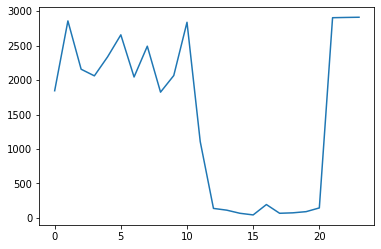

In [165]:
#data prediksi
plt.plot(hasil)

In [166]:
model.save('cluster3.h5')

# C4

In [190]:
## do the same for the others, tapi karena yang lain punya beberapa anggota, nah itu di average dulu per tanggalnya
c4=c4.drop(columns=['Kode Produk', 'Cluster'])

In [191]:
#next, buat dia kayak mejeneng time series seperti biasanya, which is datanya ke bawah, tapi di average per tanggal 
new_c4=[]
time=[]
for idx,a in enumerate(c4):
    new_c4.append(c4[a].mean())
    time.append(idx)


In [192]:
new_c4

[623.6923076923077,
 673.3846153846154,
 625.0,
 588.9230769230769,
 791.6923076923077,
 510.2307692307692,
 679.3846153846154,
 602.4615384615385,
 666.4615384615385,
 643.4615384615385,
 663.0,
 555.6153846153846,
 1338.2307692307693,
 1224.076923076923,
 1327.2307692307693,
 1021.3846153846154,
 797.8461538461538,
 1000.7692307692307,
 1287.8461538461538,
 1209.3076923076924,
 1329.7692307692307,
 1436.923076923077,
 1577.3076923076924,
 1175.3846153846155]

In [193]:
#normalisasi, karena gap nya ada yang sampe ribuan, biar lebih gampang tugas ann nya
series=new_c4
min = np.min(series)
max = np.max(series)
series = series - min
series = series / (max-min)
time = np.array(time)

In [194]:
split_time = 3 # ini berapa bulan terkahir yang mau di potong buat pengujian?

time_train = time[:-split_time]
x_train =  series[:-split_time]
time_valid =  time[-split_time:]
x_valid =  series[-split_time:]

In [195]:
#buat data biar dibagi per window, jadi me masang masangkan waktu dan value,
window_size = 2
batch_size = 2
shuffle_buffer_size = 10

train_set = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)
valid_set = windowed_dataset(x_valid, window_size, batch_size, shuffle_buffer_size)

In [196]:
model = tf.keras.Sequential([
        tf.keras.layers.Dense(2, input_shape=[None, 1]),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,return_sequences=True)),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
        # tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(4)),
        tf.keras.layers.Flatten(),
        #tf.keras.layers.GlobalAveragePooling1D(),
        tf.keras.layers.Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l1(l1=0.001)),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.001, l2=0.001)),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(1)
    ])

    #the blstm part

In [197]:
#Using mae and mse
model.compile(optimizer=tf.keras.optimizers.Adam(),metrics=['mae'],loss='mse')
model.summary()
hist=model.fit(valid_set,epochs=150,validation_data=train_set)

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_55 (Dense)             (None, None, 2)           4         
_________________________________________________________________
bidirectional_22 (Bidirectio (None, None, 128)         34304     
_________________________________________________________________
bidirectional_23 (Bidirectio (None, 64)                41216     
_________________________________________________________________
flatten_11 (Flatten)         (None, 64)                0         
_________________________________________________________________
dense_56 (Dense)             (None, 512)               33280     
_________________________________________________________________
dropout_22 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_57 (Dense)             (None, 64)              

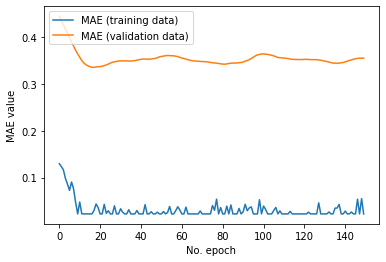

In [198]:
plt.plot(hist.history['mae'], label='MAE (training data)')
plt.plot(hist.history['val_mae'], label='MAE (validation data)')

plt.ylabel('MAE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

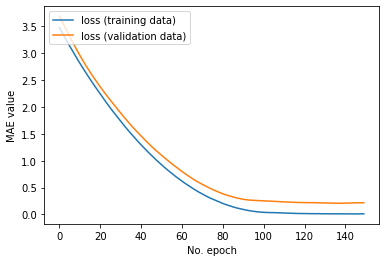

In [199]:
plt.plot(hist.history['loss'], label='loss (training data)')
plt.plot(hist.history['val_loss'], label='loss (validation data)')

plt.ylabel('MAE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [200]:
prediksi=model.predict([21, 22, 23])
prediksi

array([[0.12249045],
       [0.12249045],
       [0.12249045]], dtype=float32)

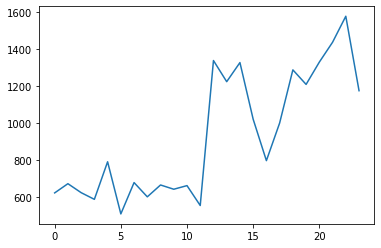

In [201]:
#data asli
series = series * (max-min)
series = series + min
plt.plot(series)

In [202]:
prediksi = prediksi * (max-min)
prediksi = prediksi + min
prediksi

array([[640.9375],
       [640.9375],
       [640.9375]], dtype=float32)

In [203]:
prediksi=prediksi.flatten()

In [204]:
hasil=np.concatenate((series[:-split_time],prediksi))

In [205]:
hasil

array([ 623.69230769,  673.38461538,  625.        ,  588.92307692,
        791.69230769,  510.23076923,  679.38461538,  602.46153846,
        666.46153846,  643.46153846,  663.        ,  555.61538462,
       1338.23076923, 1224.07692308, 1327.23076923, 1021.38461538,
        797.84615385, 1000.76923077, 1287.84615385, 1209.30769231,
       1329.76923077,  640.9375    ,  640.9375    ,  640.9375    ])

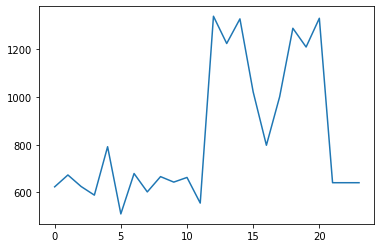

In [206]:
#data prediksi
plt.plot(hasil)

In [207]:
model.save('culster4.h0')

INFO:tensorflow:Assets written to: culster4.h0\assets


INFO:tensorflow:Assets written to: culster4.h0\assets
